-------------
### ライブラリのインポート

In [1]:
# 基本的なライブラリ
import numpy as np
import pandas as pd
from numpy.typing import NDArray
from scipy import stats

# Scikit-learn関連
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.utils.validation import check_X_y

# 抽象基底クラス (ABC)
from abc import ABCMeta, abstractmethod

# タイピングのサポート
from typing import Optional

# シード設定
from lightning.pytorch import seed_everything

# seed_everything(8)

# 可視化の設定
import matplotlib.pyplot as plt
import japanize_matplotlib
import itertools

plt.style.use("ggplot")

--------------
### 手法の比較

In [2]:
reduction_dict_cuped = {"CUPED": 20}
reduction_dict_proportional = {
    "Kmeans": 5,
    "Lasso-Kmeans": 20,
    "SFS-Kmeans-TSST": 3,
    "SFS-Kmeans-Var": 10,
}
reduction_dict_post = {
    "Kmeans": 9,
    "Lasso-Kmeans": 8,
    "SFS-Kmeans-TSST": 5,
    "SFS-Kmeans-Var": 4,
}
reduction_dict_optimal = {
    "Kmeans": 5,
    "Lasso-Kmeans": 20,
    "SFS-Kmeans-TSST": 3,
    "SFS-Kmeans-Var": 10,
}


### 削減率用

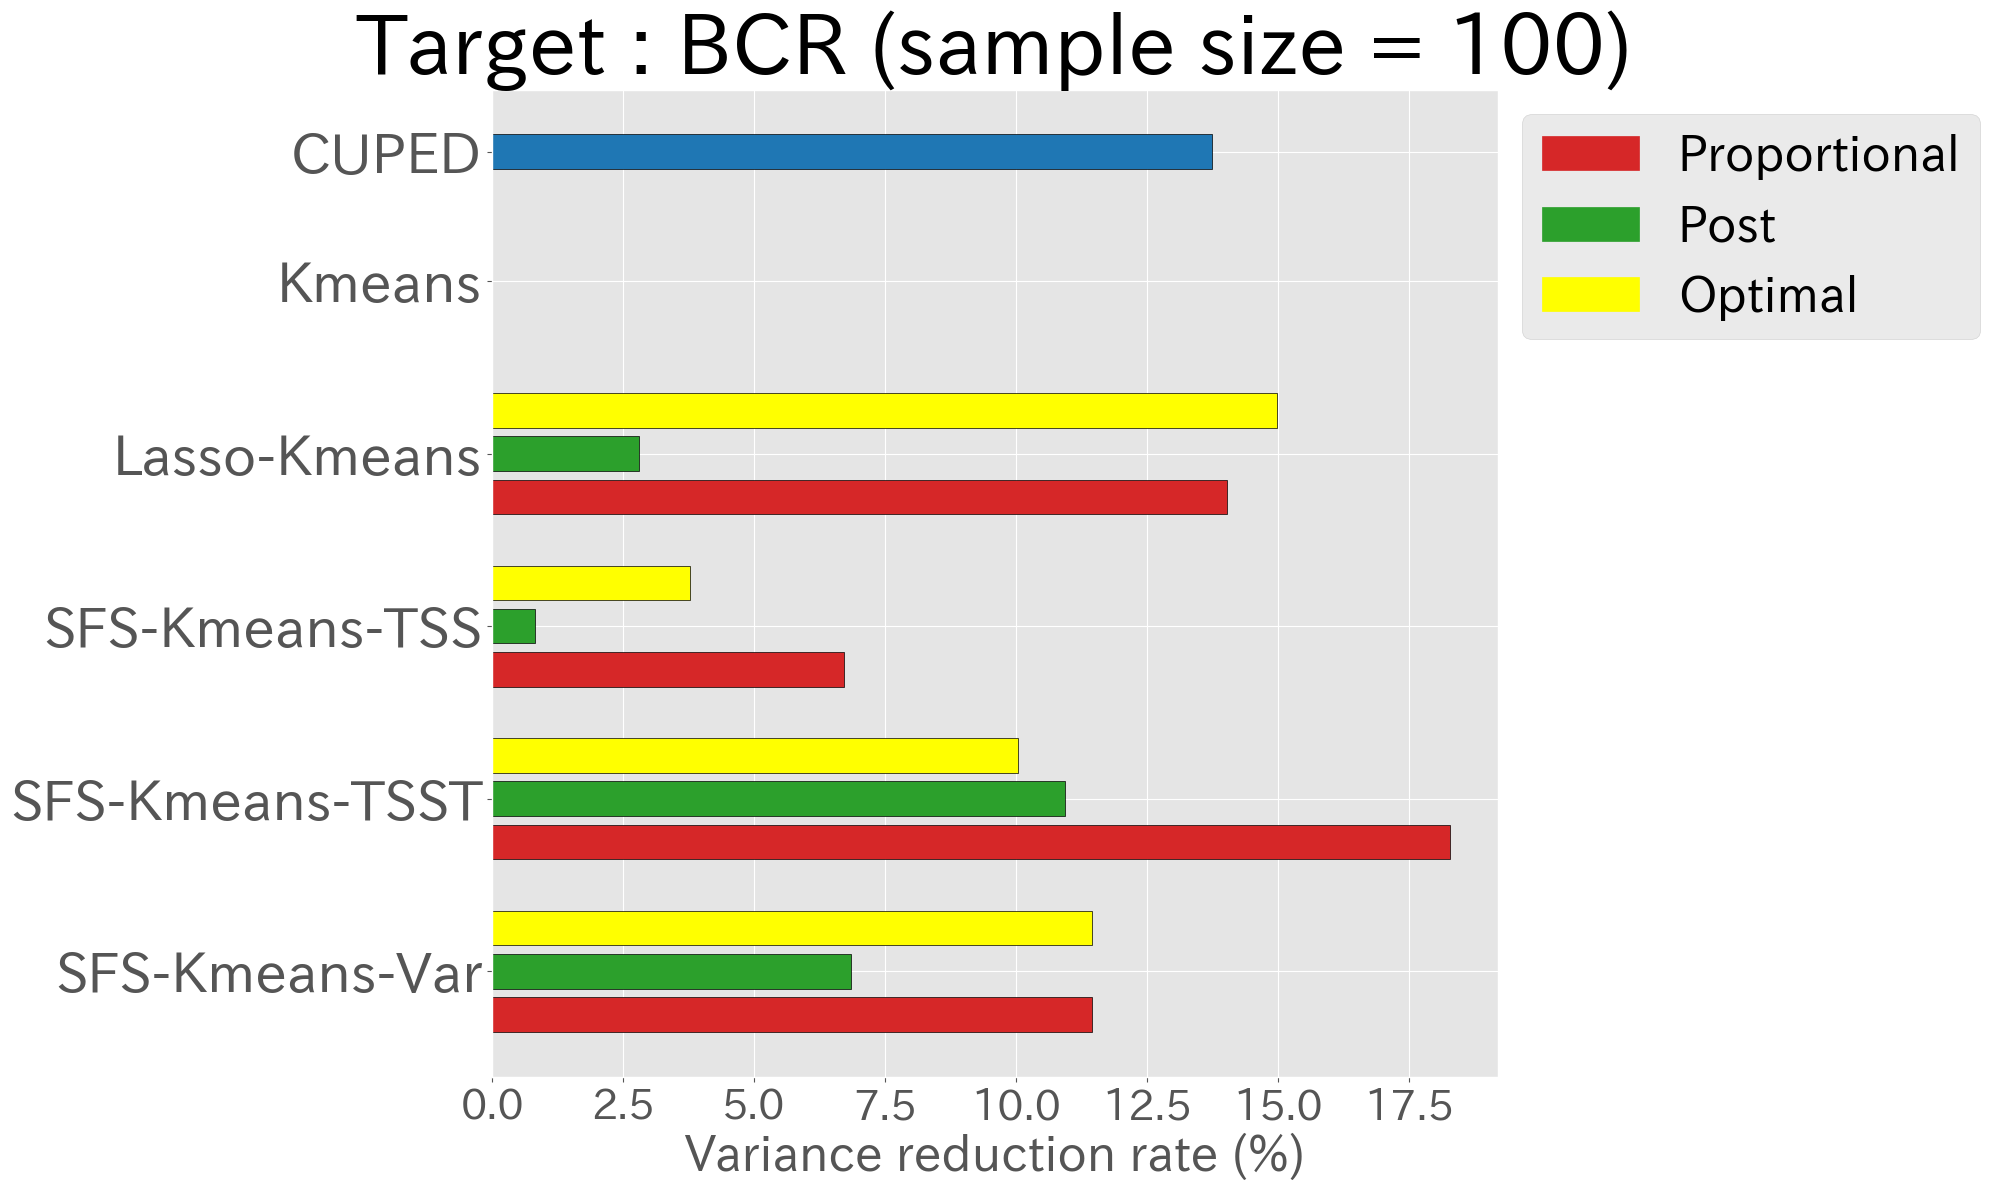

In [3]:
# 辞書データの定義
reduction_rate_dict_dict = {
    "CUPED": 13.746,
    "Kmeans": {"Proportional": 0, "Post": 0, "Optimal": 0},
    "Lasso-Kmeans": {"Proportional": 14.02, "Post": 2.81, "Optimal": 14.98},
    "SFS-Kmeans-TSS": {"Proportional": 6.72, "Post": 0.81, "Optimal": 3.77},
    "SFS-Kmeans-TSST": {"Proportional": 18.28, "Post": 10.94, "Optimal": 10.03},
    "SFS-Kmeans-Var": {"Proportional": 11.45, "Post": 6.84, "Optimal": 11.45},
}

# グラフ用データを準備
labels = [
    "SFS-Kmeans-Var",
    "SFS-Kmeans-TSST",
    "SFS-Kmeans-TSS",
    "Lasso-Kmeans",
    "Kmeans",
    "CUPED",
]
values = (
    list(reduction_rate_dict_dict["SFS-Kmeans-Var"].values())
    + [0]
    + list(reduction_rate_dict_dict["SFS-Kmeans-TSST"].values())
    + [0]
    + list(reduction_rate_dict_dict["SFS-Kmeans-TSS"].values())
    + [0]
    + list(reduction_rate_dict_dict["Lasso-Kmeans"].values())
    + [0]
    + list(reduction_rate_dict_dict["Kmeans"].values())
    + [0]
    + [reduction_rate_dict_dict["CUPED"]]
)

# 各グループに色を割り当て、間隔には透明な色を使用
colors = (
    ["#d62728", "#2ca02c", "#FFFF00"]
    + ["#FFFFFF00"]
    + ["#d62728", "#2ca02c", "#FFFF00"]
    + ["#FFFFFF00"]
    + ["#d62728", "#2ca02c", "#FFFF00"]
    + ["#FFFFFF00"]
    + ["#d62728", "#2ca02c", "#FFFF00"]
    + ["#FFFFFF00"]
    + ["#d62728", "#2ca02c", "#FFFF00"]
    + ["#FFFFFF00"]
    + ["#1f77b4"]
)

# 各ラベルが3つの棒の真ん中に配置されるように位置を調整
y_positions = [1, 5, 9, 13, 17, 20]

# グラフを描画
fig, ax = plt.subplots(figsize=(20, 12))
ax.barh(range(len(values)), values, color=colors, edgecolor="black")

# 凡例の追加
legend_labels = ["Proportional", "Post", "Optimal"]
# 色のリスト
legend_colors = ["#d62728", "#2ca02c", "#FFFF00"]
# 各ラベルに対してハンドルを作成
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(handles, legend_labels, fontsize=35, loc="upper left", bbox_to_anchor=(1, 1))


# y軸の目盛りとラベルを設定
ax.set_yticks(y_positions)
ax.tick_params(axis="x", labelsize=30)
ax.set_yticklabels(labels, fontsize=40)
ax.set_xlabel("Variance reduction rate (%)", fontsize=35)
ax.set_title("Target : BCR (sample size = 100)", fontsize=60)

plt.tight_layout()
plt.show()


### 分散用

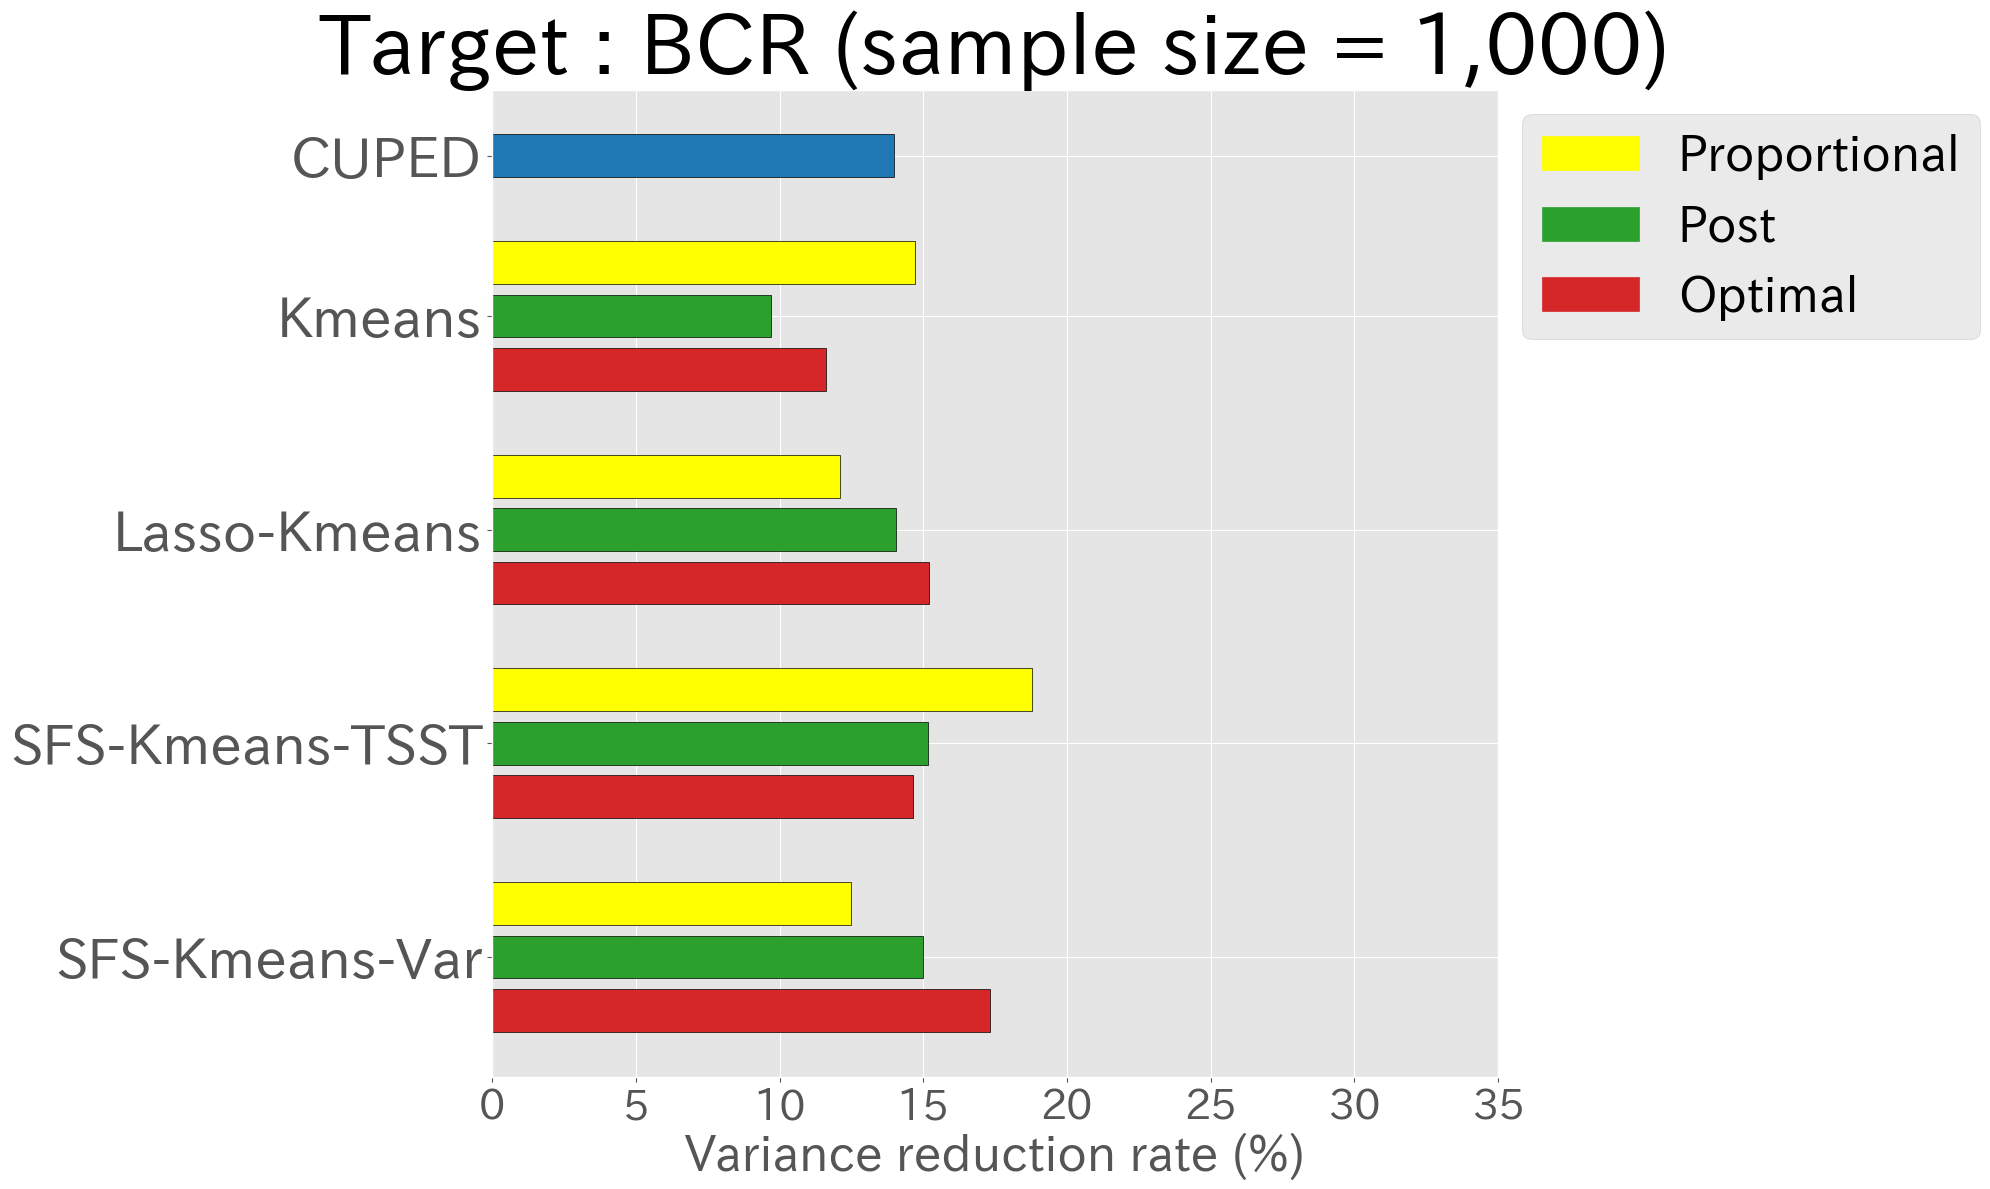

In [16]:
# 辞書データの定義
reduction_rate_dict_dict = {
    "CUPED": 13.99,
    "Kmeans": {"Optimal": 11.61, "Post": 9.7, "Proportional": 14.7},
    "Lasso-Kmeans": {"Optimal": 15.21, "Post": 14.05, "Proportional": 12.09},
    "SFS-Kmeans-TSST": {"Optimal": 14.64, "Post": 15.16, "Proportional": 18.77},
    "SFS-Kmeans-Var": {"Optimal": 17.32, "Post": 14.99, "Proportional": 12.47},
}

# グラフ用データを準備
labels = [
    "SFS-Kmeans-Var",
    "SFS-Kmeans-TSST",
    "Lasso-Kmeans",
    "Kmeans",
    "CUPED",
]
values = (
    list(reduction_rate_dict_dict["SFS-Kmeans-Var"].values())
    + [0]
    + list(reduction_rate_dict_dict["SFS-Kmeans-TSST"].values())
    + [0]
    + list(reduction_rate_dict_dict["Lasso-Kmeans"].values())
    + [0]
    + list(reduction_rate_dict_dict["Kmeans"].values())
    + [0]
    + [reduction_rate_dict_dict["CUPED"]]
)

# 各グループに色を割り当て、間隔には透明な色を使用
colors = (
    ["#d62728", "#2ca02c", "#FFFF00"]
    + ["#FFFFFF00"]
    + ["#d62728", "#2ca02c", "#FFFF00"]
    + ["#FFFFFF00"]
    + ["#d62728", "#2ca02c", "#FFFF00"]
    + ["#FFFFFF00"]
    + ["#d62728", "#2ca02c", "#FFFF00"]
    + ["#FFFFFF00"]
    + ["#1f77b4"]
)

# 各ラベルが3つの棒の真ん中に配置されるように位置を調整
y_positions = [1, 5, 9, 13, 16]

# グラフを描画
fig, ax = plt.subplots(figsize=(20, 12))
ax.barh(range(len(values)), values, color=colors, edgecolor="black")

# 凡例の追加
legend_labels = ["Proportional", "Post", "Optimal"]
# 色のリスト
legend_colors = ["#FFFF00", "#2ca02c", "#d62728"]
# 各ラベルに対してハンドルを作成
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
ax.legend(handles, legend_labels, fontsize=35, loc="upper left", bbox_to_anchor=(1, 1))


# y軸の目盛りとラベルを設定
ax.set_yticks(y_positions)
ax.tick_params(axis="x", labelsize=30)
ax.set_yticklabels(labels, fontsize=40)
ax.set_xlabel("Variance reduction rate (%)", fontsize=35)
ax.set_title("Target : BCR (sample size = 1,000)", fontsize=60)
ax.set_xlim(0, 35)
plt.tight_layout()
plt.show()


----------------
### 箱ひげ図

In [5]:
results_reduction_rate1 = {
    "Kmeans([5])": {
        "Proportional": [
            18.544098456307157,
            18.49066033872545,
            17.411638669055375,
            18.05567226605074,
            17.654222544907803,
            18.61751235342133,
            17.44019306591896,
            18.213776145641646,
            18.516719627146227,
            17.609210730206946,
        ]
    }
}
results_reduction_rate2 = {
    "Kmeans([3])": {
        "Proportional": [
            17.019951716286783,
            17.026186464246507,
            15.931822987437217,
            16.49159618407229,
            16.480492415490332,
            17.54495976295121,
            16.402130017492233,
            16.57738848884358,
            16.831981052608512,
            15.945272224041174,
        ]
    }
}

results_reduction_rate_list = [results_reduction_rate1, results_reduction_rate2]


C:\Users\HaruMomozu\AppData\Local\Temp\ipykernel_26572\4269894540.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(allo_data, labels=allo_labels)


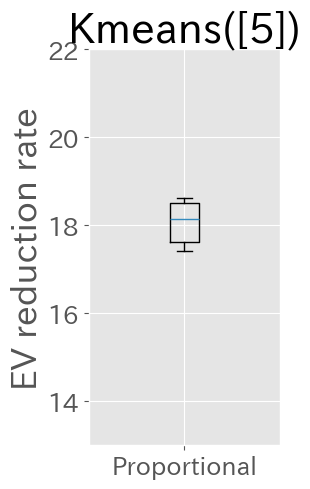

C:\Users\HaruMomozu\AppData\Local\Temp\ipykernel_26572\4269894540.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(allo_data, labels=allo_labels)


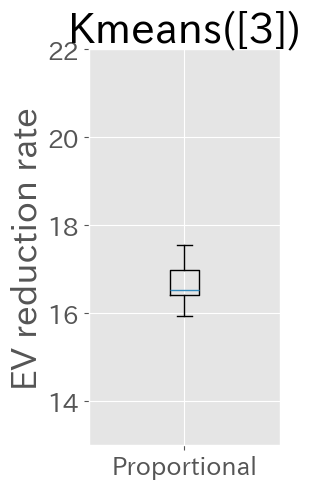

In [6]:
for results_reduction_rate in results_reduction_rate_list:
    # 誤差分散削減率の箱ひげ図
    fig, axs = plt.subplots(
        1, len(results_reduction_rate), figsize=(3 * len(results_reduction_rate), 5)
    )  # サブプロットを作成

    # 各methodに対して
    plot_idx = 0  # サブプロットのインデックス
    for i, (method, allocations) in enumerate(results_reduction_rate.items()):
        allo_data = list(allocations.values())  # allo1, allo2, allo3 のデータリスト
        allo_labels = list(allocations.keys())  # alloのラベルリスト
        if len(results_reduction_rate) == 1:
            ax = axs
        else:
            ax = axs[plot_idx]
        ax.boxplot(allo_data, labels=allo_labels)
        # グラフタイトルを設定
        ax.set_title(f"{method}", fontsize=30)
        ax.set_ylabel("EV reduction rate", fontsize=25)
        ax.tick_params(axis="both", which="major", labelsize=18)
        ax.set_ylim(13, 22)
        plot_idx += 1

    # グラフを表示
    plt.tight_layout()  # レイアウトを調整
    plt.show()

------------
### 棒グラフ

In [7]:
mean_results_reduction_rate_kmeans = {
    "Kmeans": {
        "Proportional": 12.08,
        "Post": 4.53,
        "Optimal": 3.72,
    }
}
mean_results_reduction_rate_obj = {
    "SFS-Kmeans-TSST": {
        "Proportional": 13.85,
        "Post": 4.92,
        "Optimal": 7.5,
    }
}
mean_results_reduction_rate_pro = {
    "SFS-Kmeans-TSS": {
        "Proportional": 6.07,
        "Post": 1.05,
        "Optimal": 4.95,
    }
}
mean_results_reduction_rate_list = [
    mean_results_reduction_rate_kmeans,
    mean_results_reduction_rate_obj,
    mean_results_reduction_rate_pro,
]


['Proportional', 'Post', 'Optimal']
[12.08, 4.53, 3.72]


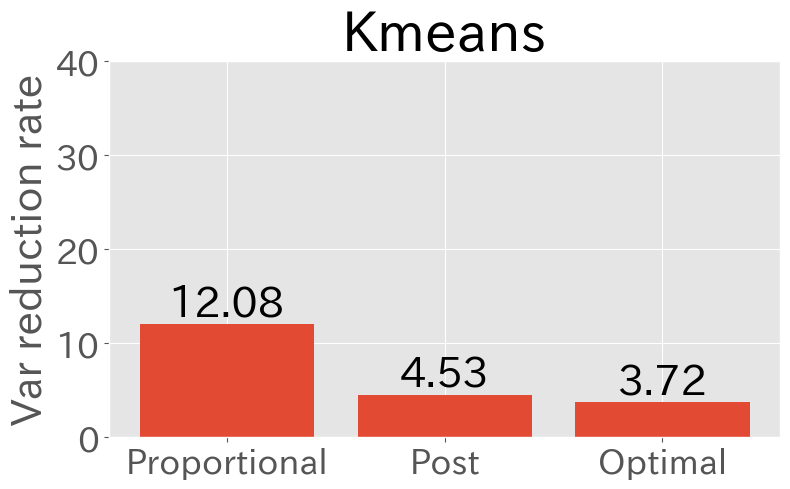

['Proportional', 'Post', 'Optimal']
[13.85, 4.92, 7.5]


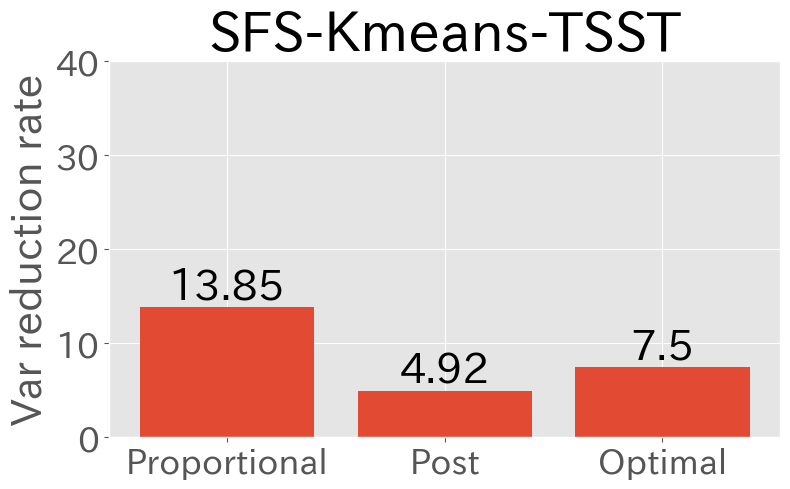

['Proportional', 'Post', 'Optimal']
[6.07, 1.05, 4.95]


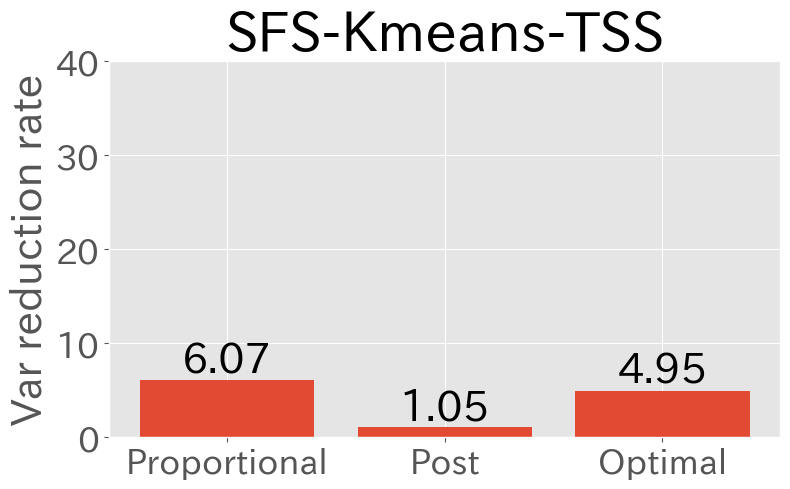

In [8]:
for mean_results_reduction_rate in mean_results_reduction_rate_list:
    # グラフ作成
    fig, axs = plt.subplots(
        1,
        len(mean_results_reduction_rate),
        figsize=(8 * len(mean_results_reduction_rate), 5),
    )  # サブプロットを作成

    plot_idx = 0
    for method, dict in mean_results_reduction_rate.items():
        x = ["Proportional", "Post", "Optimal"]
        values = [val for val in mean_results_reduction_rate[method].values()]  # y軸
        print(x)
        print(values)
        if len(mean_results_reduction_rate) == 1:
            ax = axs
        else:
            ax = axs[plot_idx]
        bars = ax.bar(x, values)
        # 各バーの上に値を表示
        for bar in bars:
            yval = bar.get_height()  # 各バーの高さ（値）
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                yval,
                round(yval, 2),
                ha="center",
                va="bottom",
                fontsize=30,
            )  # 値をバーの上に表示
            # plt.ylabel("誤差分散削減率 (%)")
        ax.set_ylabel("Var reduction rate", fontsize=30)
        ax.set_ylim(0, 40)
        ax.tick_params(axis="both", which="major", labelsize=25)
        ax.set_title(f"{method}", fontsize=40)  # (number of clusters: {clusters})")
        plot_idx += 1

    plt.tight_layout()
    plt.show()

---------
### しゅ